In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Método Runge-Kutta

$\frac{du}{dt} = f(t, u)$

In [2]:
def u(f, tn, un, h = 0.1):
    k1 = f(tn, un)
    k2 = f(tn + h/2, un + (h/2)*k1)
    k3 = f(tn + h/2, un + (h/2)*k2)
    k4 = f(tn + h, un + h*k3)
    return un + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

def evaluate_numeric(f, u0, h = 0.1, start = 0, finish = 2, method = u):
    t = np.arange(start, finish + h, h)
    ux = [u0]
    for i in range(1, len(t)):
        ux.append(method(f, t[i],ux[i-1], h))
    return np.vstack((np.transpose(t), np.transpose(ux)))


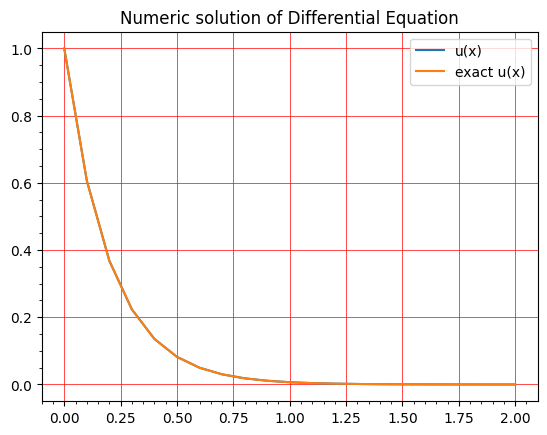

In [3]:
def dfdt(t, u):
    return -5*u

res = evaluate_numeric(dfdt, 1)

t_n = res[0]
u_n = res[1]
exact_u = np.exp(-5* t_n)
erro = np.abs(u_n - exact_u)/exact_u

fig, ax = plt.subplots()

plt.plot(t_n, u_n, label="u(x)")
plt.plot(t_n, exact_u, label="exact u(x)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()

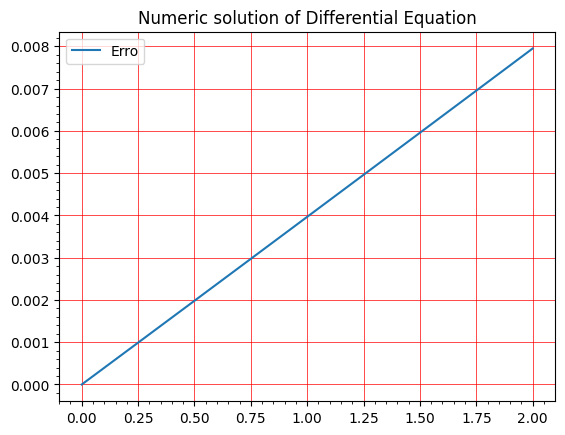

In [4]:
fig, ax = plt.subplots()

plt.plot(t_n, erro, label="Erro")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()

# Runge Kutta matricial:

In [5]:
def dfdt2(t, u):
    u1 = u[0]
    u2 = u[1]
    return np.array([1.2 * u1 - 0.6*u1*u2, 0.8*u2 + 0.3*u1*u2])

res2 = evaluate_numeric(dfdt2, np.array([2,1]), h = 0.001, finish = 20)

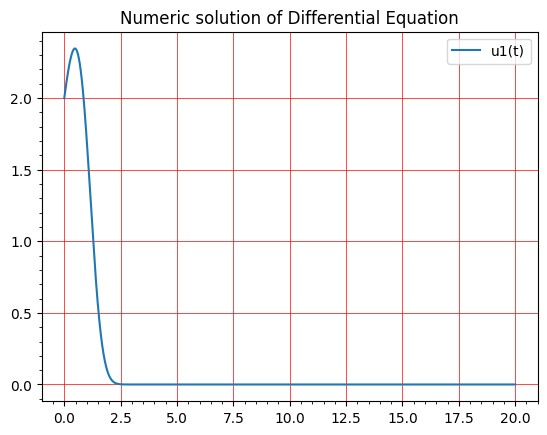

In [6]:
fig, ax = plt.subplots()

t_n = res2[0]
u0 = res2[1]
u1 = res2[2]

plt.plot(t_n, u0, label="u1(t)")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()


In [20]:
def u2(f, tn, un, h = 0.1):
    k1 = f(tn,           un)
    k2 = f(tn + (1/2)*h, un + (1/2)*k1)
    k3 = f(tn + (3/4)*h, un + (3/4)*k2)
    return un + h*((2/9)*k1 + (3/9)*k2 + (4/9)*k3)

def u3(f, tn, un, h = 0.1):
    k1 = f(tn,           un)
    k2 = f(tn + (1/2)*h, un + (1/2)*k1)
    k3 = f(tn + (3/4)*h, un + (3/4)*k2)
    k4 = f(tn + h,       un + (2/9)*k1 + (3/9)*k2 + (4/9)*k3)
    return un + h*((7/24)*k1 + (6/24)*k2 + (8/24)*k3 + (3/24)*k4)

def evaluate_numeric_2(f, u0, h = 0.1, start = 0, finish = 2):
    return evaluate_numeric(f, u0, h, start, finish, method = u2)

def evaluate_numeric_3(f, u0, h = 0.1, start = 0, finish = 2):
    return evaluate_numeric(f, u0, h, start, finish, method = u3)

In [21]:
def dfdt3(t, u):
    return 10 * math.exp(-(t-2)**2/(2*0.075**2)) - 0.6*u

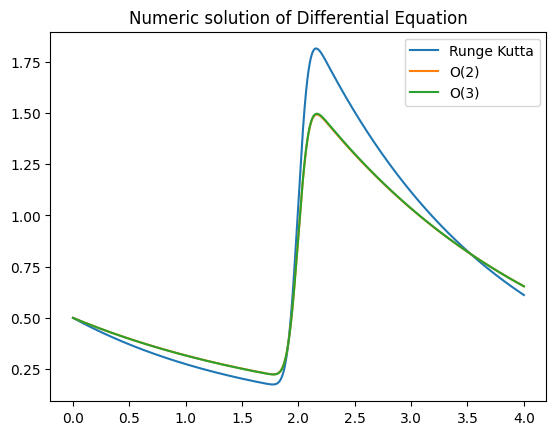

In [22]:
res = evaluate_numeric(dfdt3, 0.5, h=0.001, finish=4)
res2 = evaluate_numeric_2(dfdt3, 0.5, h=0.001, finish=4)
res3 = evaluate_numeric_3(dfdt3, 0.5, h=0.001, finish=4)

plt.plot(res[0], res[1], label="Runge Kutta")
plt.plot(res2[0], res2[1], label="O(2)")
plt.plot(res3[0], res3[1], label="O(3)")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()